# comparison

> AquaCrop-OSP | AquaCrop-OS | AquaCrop | Test Comparison
> aquacrop python is tested against windows aquacrop and matlab to ensure 


## Excersise 7: Wheat production in Tunis

### From Chapter 7 of  <a href="../pdfs/AquaCrop_TrainingHandookB.pdf">AquaCrop Training Handbook</a> (pg. 64)

## Exercise 7.1: Assessing crop yield for local soils

### Imports

In [24]:
# uncomment if required
# !pip install aquacrop

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from aquacrop.core import AquaCropModel
from aquacrop.entities.soil import Soil
from aquacrop.entities.crop import  Crop
from aquacrop.entities.inititalWaterContent import InitialWaterContent
from aquacrop.entities.irrigationManagement import IrrigationManagement
from aquacrop.entities.fieldManagement import FieldMngt
from aquacrop.entities.groundWater import  GroundWater
from aquacrop.utils.prepare_weather import prepare_weather
from aquacrop.utils.data import get_filepath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Run comparison

In [26]:
#model.Outputs.Final

In [27]:
#export
def run_comparison(model,name):
    """
    Function to run a comparison between python matlab and windows. 
    Plots yields and prints mean and mean absolute error between them
    
    *Arguments:* 

    
    `name`: `str` : name of directory containing input files

    *Returns:*

    None

        
    """    
    Outputs = model._outputs
    
    py = Outputs.final_stats.round(3)
    py.columns = ["Season","CropType","HarvestDate","Harvest Date (Step)","Yield","Seasonal irrigation (mm)"]
    
    matlab = pd.read_csv(get_filepath(name+'_matlab.txt'),delim_whitespace=True,header=None)
    matlab.columns = ["season","crop","plantdate","stepplant","harvestdate","stepharvest","Yield","tirr"]

    
    windows_names = ('    RunNr     Day1   Month1    Year1     Rain      ETo       GD     CO2      Irri   Infilt   Runoff    Drain   Upflow        E     E/Ex       Tr      TrW   Tr/Trx    SaltIn   SaltOut    SaltUp  SaltProf     Cycle   SaltStr  FertStr  WeedStr  TempStr   ExpStr   StoStr  BioMass  Brelative   HI     Yield     WPet     DayN   MonthN    YearN'.split())
    windows = pd.read_csv(get_filepath(name+'_windows.OUT'),skiprows=5,delim_whitespace=True,names=windows_names,encoding="ISO-8859-1")

    combined = pd.DataFrame([py.Yield,windows.Yield,matlab.Yield]).T

    combined.columns = ["py", "windows","matlab"]
    mae = np.round(np.abs(combined.py - combined.windows).mean(),2)
    pymean = combined.mean().py.round(2)
    print(f'python seasonal mean: {pymean} kg/ha\nMAE from windows: {mae} kg/ha')
    
    mae_mat = np.round(np.abs(combined.py - combined.matlab).mean(),3)
    print(f'MAE from matlab:  {mae_mat} kg/ha')
    
    plt.style.use('seaborn')
    
    fig, ax = plt.subplots(2,1,sharex=True,figsize=(11,8))
    
    ax[0].plot(py.Yield,label='Python')
    ax[0].plot(matlab.Yield,label='Matlab')
    ax[0].plot(windows.Yield,'--',label='Windows')
    ax[0].legend(fontsize = 18)
    ax[0].set_ylabel('Yield',fontsize=18)
    
    #sns.jointplot(np.arange(len(py)), py.Yield - windows.Yield,
      #            kind="resid",color="m",ratio=10)
    
    ax[1].scatter(np.arange(len(py)),py.Yield - windows.Yield,label='Python')
    ax[1].scatter(np.arange(len(py)),matlab.Yield - windows.Yield,label='Matlab')
    ax[1].plot([0,len(py)],[0,0],'--',color='black')
    ax[1].set_xlabel('Season',fontsize=18)
    ax[1].set_ylabel('Residuals',fontsize=18)
    ax[1].legend(fontsize = 18)

    



    plt.show()
    
    
    return Outputs,windows

In [28]:
wdf = prepare_weather(get_filepath('tunis_climate.txt'))

soil=Soil(soil_type='ac_TunisLocal')
crop = Crop('WheatGDD',planting_date= '10/15')

iwc = InitialWaterContent('Num','Depth',[0.3,0.9],[0.3,0.15])

model = AquaCropModel('1979/10/15','2002/05/30',wdf,soil,crop,initial_water_content=iwc)



%time model.run_model(till_termination=True)

CPU times: user 1.74 s, sys: 0 ns, total: 1.74 s
Wall time: 1.74 s


True

python seasonal mean: 7.52 kg/ha
MAE from windows: 0.02 kg/ha
MAE from matlab:  0.002 kg/ha


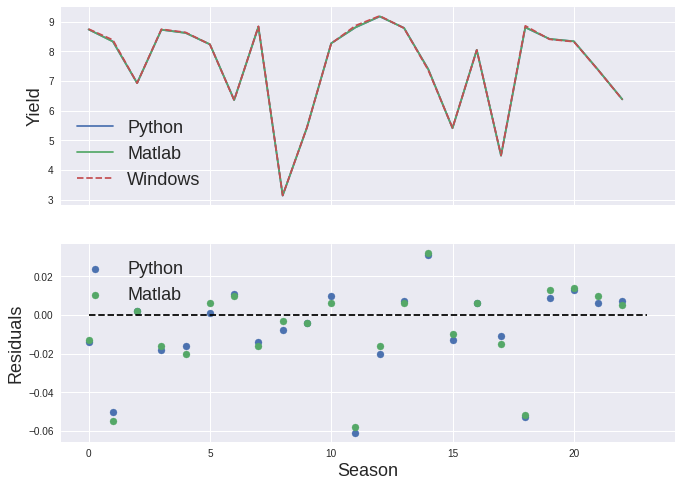

In [29]:
res = run_comparison(model,'tunis_test_1')

### Sandy loam soil

python seasonal mean: 8.64 kg/ha
MAE from windows: 0.01 kg/ha
MAE from matlab:  0.002 kg/ha


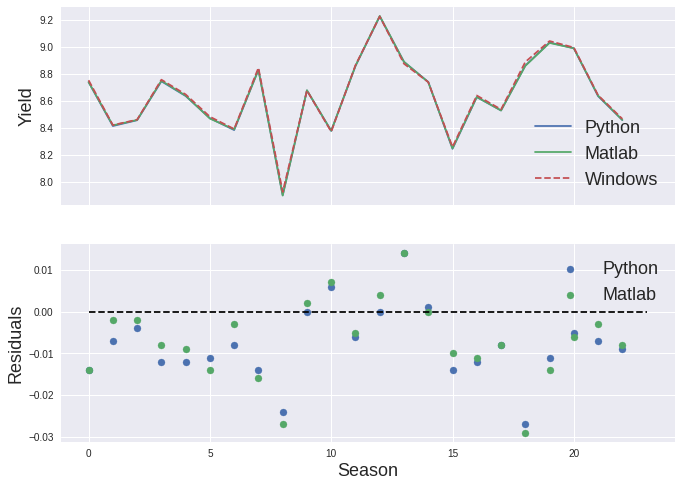

In [30]:
sandy_loam = Soil('SandyLoam')
model = AquaCropModel('1979/01/01','2002/05/30',wdf,sandy_loam,crop,initial_water_content=iwc)
model.run_model(till_termination=True)
res = run_comparison(model,'tunis_test_1_SandyLoam')

## Excercise 7.2 Local Wheat variety

In [31]:
local_wheat = Crop('WheatGDD',planting_date= '10/15',
                        Emergence=289, 
                        MaxRooting = 1322,
                        Senescence = 2835, 
                        Maturity = 3390,
                        HIstart = 2252,
                        Flowering = 264,
                        YldForm = 1073,
                        PlantPop=3_500_000,
                        CCx=0.9,
                        CDC=0.003888,
                        CGC=0.002734)

python seasonal mean: 8.68 kg/ha
MAE from windows: 0.04 kg/ha
MAE from matlab:  0.042 kg/ha


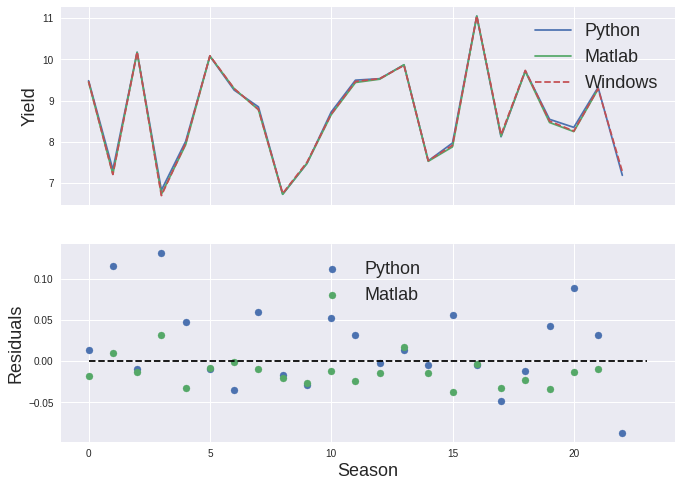

In [32]:
model = AquaCropModel('1979/01/01','2002/05/31',wdf,sandy_loam,local_wheat,initial_water_content=iwc)
model.run_model(till_termination=True)
_ = run_comparison(model,'tunis_test_2_long')

## Excercise 7.3 Different initial conditions

In [33]:
iwc30taw = InitialWaterContent('Pct','Layer',[1],[30])

python seasonal mean: 5.85 kg/ha
MAE from windows: 0.09 kg/ha
MAE from matlab:  0.002 kg/ha


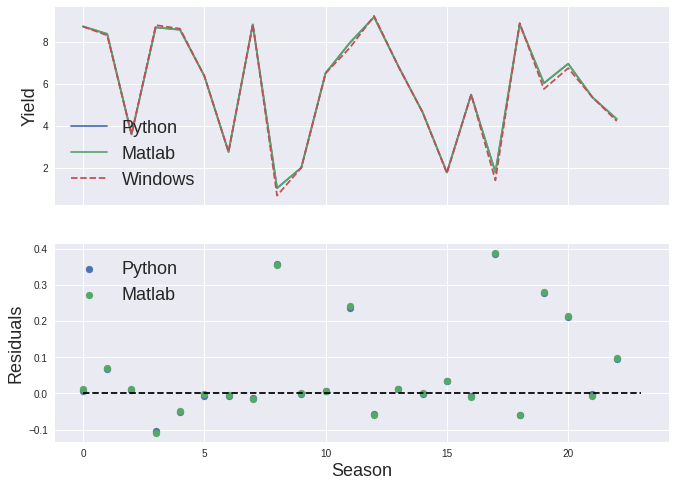

In [34]:
model = AquaCropModel('1979/01/01','2002/05/31',wdf,sandy_loam,
                      crop,initial_water_content=iwc30taw)

model.run_model(till_termination=True)
_ = run_comparison(model,'tunis_test_3_30taw')

## Excercise 7.6 Net irrigation requirement

In [35]:
net_irr = IrrigationManagement(irrigation_method=4,net_irr=78.26)
wp = InitialWaterContent(value=['WP'])
wheat_dec = Crop('WheatGDD',planting_date='12/01',harvest_date='07/30')

python seasonal mean: 8.38 kg/ha
MAE from windows: 0.01 kg/ha
MAE from matlab:  0.003 kg/ha


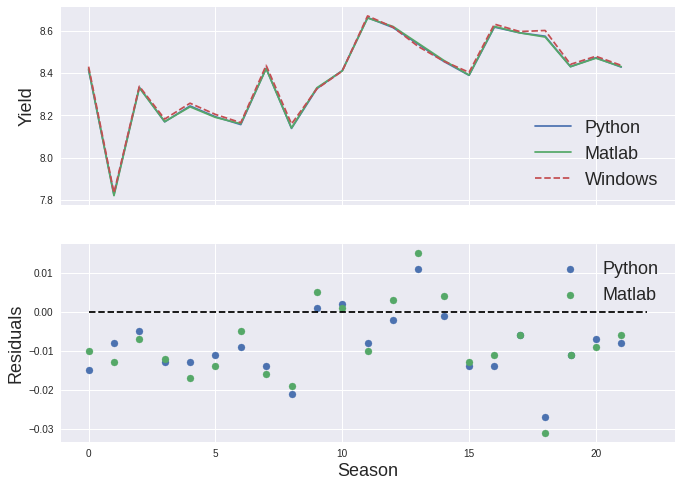

In [36]:
model = AquaCropModel('1979/08/15','2001/07/30',wdf,sandy_loam,
                      wheat_dec,initial_water_content=wp,irrigation_management=net_irr)
model.run_model(till_termination=True)
res = run_comparison(model,'tunis_test_6')

## Excersise 8 : Hyderabad : Chapter 8 of  <a href="../pdfs/AquaCrop_TrainingHandookB.pdf">AquaCrop Training Handbook</a>

## Excersise 8.1

In [37]:
wdf = prepare_weather(get_filepath('hyderabad_climate.txt'))

wdf.Date.min(),wdf.Date.max()

(Timestamp('2000-01-01 00:00:00'), Timestamp('2010-12-31 00:00:00'))

python seasonal mean: 6.43 kg/ha
MAE from windows: 0.01 kg/ha
MAE from matlab:  0.013 kg/ha


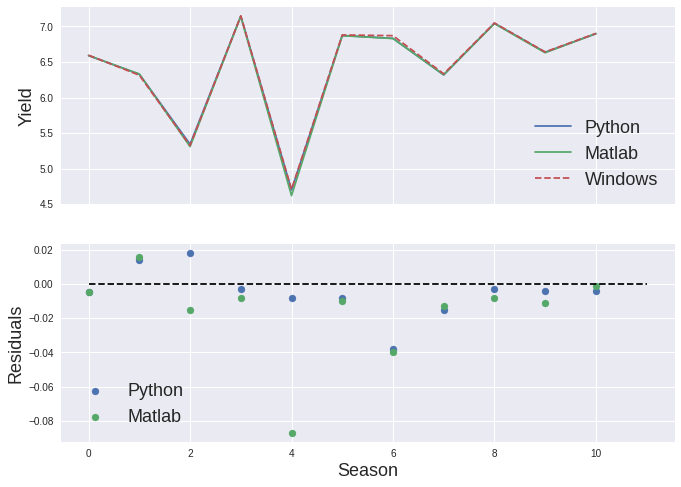

In [38]:
rice = Crop('localpaddy',planting_date= '08/01',)
paddy = Soil('Paddy')
iwc_paddy = InitialWaterContent(depth_layer=[1,2],value=['FC','FC'])
fm = FieldMngt(bunds=True,z_bund=0.2)
model = AquaCropModel('2000/01/01','2010/12/31',wdf,paddy,
                      rice,initial_water_content=iwc_paddy,field_management=fm,
                      fallow_field_management=fm)
model.run_model(till_termination=True)
_ = run_comparison(model,'paddyrice_hyderabad')

## Excersise 9 : Brussels : Chapter 9 of  <a href="../pdfs/AquaCrop_TrainingHandookB.pdf">AquaCrop Training Handbook</a>

### Excersise 9.1

In [39]:
wdf = prepare_weather(get_filepath('brussels_climate.txt'))

wdf.Date.min(),wdf.Date.max()

(Timestamp('1976-01-01 00:00:00'), Timestamp('2005-12-31 00:00:00'))

python seasonal mean: 9.69 kg/ha
MAE from windows: 0.1 kg/ha
MAE from matlab:  0.029 kg/ha


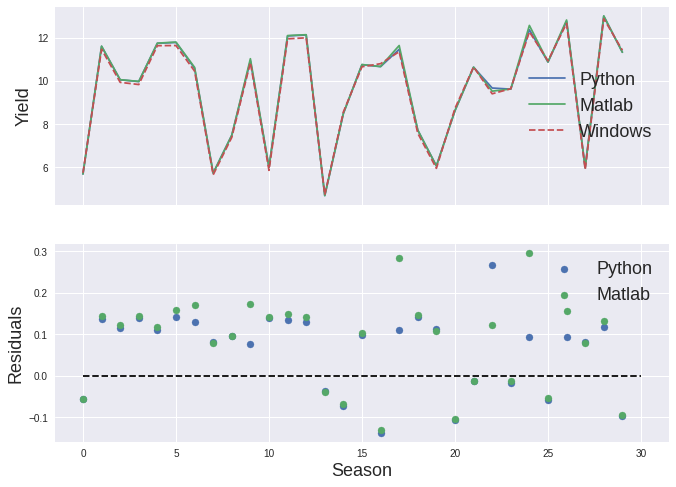

In [40]:
potato = Crop('PotatoLocal',planting_date= '04/25')
loam = Soil('Loam')
model = AquaCropModel('1976/01/01','2005/12/31',wdf,loam,potato,InitialWaterContent())
model.run_model(till_termination=True)
_ = run_comparison(model,'potato')

## Calculate RMSE for particular variables (for debugging)

In [41]:

windows_names = ('    RunNr     Day1   Month1    Year1     Rain      ETo       GD     CO2      Irri   Infilt   Runoff    Drain   Upflow        E     E/Ex       Tr      TrW   Tr/Trx    SaltIn   SaltOut    SaltUp  SaltProf     Cycle   SaltStr  FertStr  WeedStr  TempStr   ExpStr   StoStr  BioMass  Brelative   HI     Yield     WPet     DayN   MonthN    YearN'.split())
windows = pd.read_csv(get_filepath('potato'+'_windows.OUT'),skiprows=5,delim_whitespace=True,names=windows_names,encoding="ISO-8859-1")


In [42]:
infil = windows.Infilt.values
runoff = windows.Runoff.values
drain = windows.Drain.values
e = windows.E.values
tr = windows.Tr.values
bio = windows.BioMass*100
hi = windows.HI/100



In [43]:
grouped1 = model._outputs.crop_growth.groupby('season_counter').max()
grouped1.head()

,time_step_counter,dap,gdd,gdd_cum,z_root,canopy_cover,canopy_cover_ns,biomass,biomass_ns,harvest_index,harvest_index_adj,yield_
season_counter,,,,,,,,,,,,
-1.0,114.0,0.0,0.3,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
0.0,239.0,125.0,21.7,1884.25,0.6,0.862350,0.901142,727.594299,1336.718464,0.85,0.783289,5.699169
1.0,604.0,125.0,19.7,1604.70,0.6,0.919523,0.919523,1365.151078,1372.454625,0.85,0.849932,11.602858
2.0,969.0,125.0,20.7,1608.35,0.6,0.919523,0.919523,1200.169603,1376.180500,0.85,0.837747,10.054389
3.0,1334.0,125.0,20.0,1599.15,0.6,0.892085,0.901142,1191.474260,1373.349628,0.85,0.837168,9.974647


In [44]:
grouped = model._outputs.water_flux.groupby('season_counter').sum()
grouped.head()

,time_step_counter,dap,Wr,z_gw,surface_storage,IrrDay,Infl,Runoff,DeepPerc,CR,GwIn,Es,EsPot,Tr,TrPot
season_counter,,,,,,,,,,,,,,,
-1.0,6555.0,0.0,10019.89,-114885.0,0.0,0.0,131.882145,4.117855,71.117311,0.0,0.0,82.601730,135.080000,0.000000,0.000000
0.0,22125.0,7875.0,13719.62,-124875.0,0.0,0.0,148.172417,2.127583,0.000000,0.0,0.0,70.200175,223.026573,162.839113,304.919138
1.0,67750.0,7875.0,17299.10,-124875.0,0.0,0.0,303.077344,5.722656,48.054092,0.0,0.0,95.621728,139.812879,220.522103,220.566948
2.0,113375.0,7875.0,16867.71,-124875.0,0.0,0.0,307.410487,35.189513,105.719399,0.0,0.0,91.846257,138.356508,200.043602,229.744565
3.0,159000.0,7875.0,16196.70,-124875.0,0.0,0.0,270.007475,8.392525,30.311757,0.0,0.0,96.987000,137.950148,196.763470,225.579405


In [45]:
print('runoff',(((grouped.Runoff.values[1:]-runoff)**2).mean()**(0.5))/runoff.mean())
print('infil',(((grouped.Infl.values[1:]-infil)**2).mean()**(0.5))/infil.mean())
print('drain',(((grouped.DeepPerc.values[1:]-drain)**2).mean()**(0.5))/drain.mean())
print('es',(((grouped.Es.values[1:]-e)**2).mean()**(0.5))/e.mean())
print('tr',(((grouped.Tr.values[1:]-tr)**2).mean()**(0.5))/tr.mean())
print('bio',(((grouped1.biomass.values[1:]-bio)**2).mean()**(0.5))/bio.mean())
print('hi',(((grouped1.harvest_index.values[1:]-hi)**2).mean()**(0.5))/hi.mean())

runoff 0.028950898501130966
infil 0.001118950747288327
drain 0.01860681772193814
es 0.02097557914397535
tr 0.011832327627400175
bio 0.012778083976522187
hi 0.05034387357901827
